In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Load the UCI Adult Dataset
data = datasets.fetch_openml(name='adult', version=2)

# Extract features and labels
X_adult = data.data
y_adult = (data.target == '>50K').astype(int)

# Identify categorical features
categorical_features = X_adult.select_dtypes(include=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_adult.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Reduce the parameter grid size
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Use a subset of data for grid search
subset_size = 5000
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_preprocessed, y_train, train_size=subset_size, random_state=42)

# Create SVM model
svm_model = SVC()

# Create GridSearchCV object with reduced settings
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the subset of data
grid_search.fit(X_train_subset, y_train_subset)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to train the final model
best_params = grid_search.best_params_
final_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'])
final_svm_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred_final = final_svm_model.predict(X_test_preprocessed)

# Evaluate accuracy of the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {accuracy_final}")


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Final Model Accuracy: 0.8277203398505476


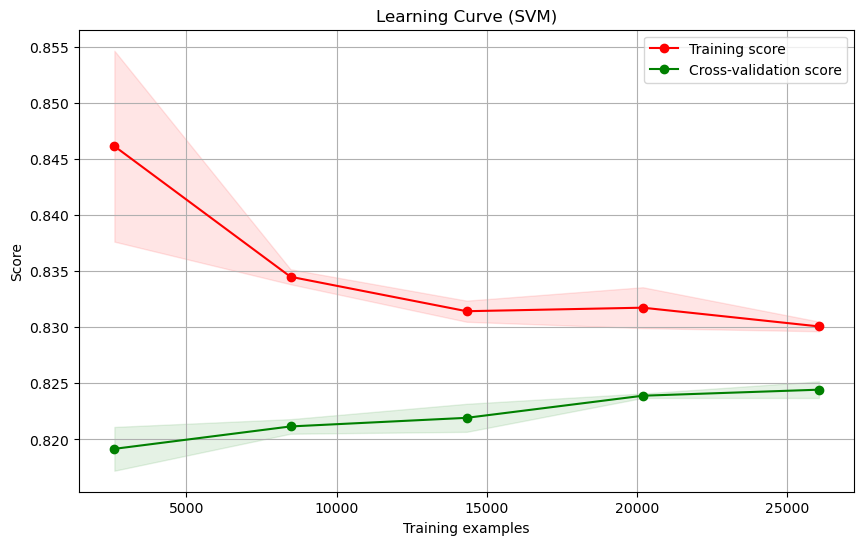

In [2]:
from sklearn.model_selection import learning_curve
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Load the UCI Adult Dataset
data = datasets.fetch_openml(name='adult', version=2)

# Extract features and labels
X_adult = data.data
y_adult = (data.target == '>50K').astype(int)

# Identify categorical features
categorical_features = X_adult.select_dtypes(include=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_adult.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create SVM model with best parameters from grid search
svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'])

# Plot learning curve
title = "Learning Curve (SVM)"
cv = 3  # Cross-validation folds
plot_learning_curve(svm_model, title, X_train_preprocessed, y_train, cv=cv, n_jobs=-1)

plt.show()
